# Calculate protein disorder

In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import gffutils
import pybedtools
import re
import numpy as np

v19db_filename = '/projects/ps-yeolab/genomes/hg19/gencode/v19/gencode.v19.annotation.gtf.db'
v19db = gffutils.FeatureDB(v19db_filename)

folder = '/projects/ps-yeolab/obotvinnik/singlecell_pnms'

prefix = 'isoform_translations'
translated_fasta = '{}/{}.fa'.format(folder, prefix)

/home/obotvinnik/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:784: UserWarning: Found matplotlib configuration in ~/.matplotlib/. To conform with the XDG base directory standard, this configuration location has been deprecated on Linux, and the new location is now /home/obotvinnik/.config/matplotlib/. Please move your configuration there to ensure that matplotlib will continue to find it in the future.
  _get_xdg_config_dir())


In [2]:
figure_folder = '/home/obotvinnik/Dropbox/figures2/singlecell_pnms/isoform_protein_properties'
! mkdir $figure_folder

mkdir: cannot create directory `/home/obotvinnik/Dropbox/figures2/singlecell_pnms/isoform_protein_properties': File exists


## Calculate disordered scores using IUPred

IUPRED: [Intrinsically unstuctured proteins](http://iupred.enzim.hu/)

In [4]:
import glob
import os
import tempfile
from collections import defaultdict

import pandas as pd
from Bio import SeqIO

disordered_scores = pd.DataFrame(columns=['isoform1', 'isoform2'])

fa = translated_fasta
basename = os.path.basename(fa)
print basename
isoform = basename.split('_')[1]
i = 0
for record in SeqIO.parse(fa, 'fasta'):
    i += 1
#         infile = tempfile.NamedTemporaryFile(delete=False)
    infile = fa + '_iupred_tmp'
    with open(infile, 'w') as f:
        SeqIO.write([record], f, 'fasta')
#         outfile = tempfile.NamedTemporaryFile(delete=False)
    outfile = fa + '_iupred_out'
#         ! cat $infile
    ! export IUPred_PATH=/projects/ps-yeolab/software/iupred ; iupred $infile short > $outfile
#         ! head -n 20 $outfile
    isoform_score = pd.read_table(outfile, skiprows=9, sep='\s+', header=None)[2].mean()
#         print record.id
    event_name, cds, isoform = record.id.split('|')
    disordered_scores.loc[event_name, isoform] = isoform_score
    if i % 1000 == 0:
        print '\tCompleted {} sequences ...'.format(i)
# disordered_scores_df = pd.DataFrame(disordered_scores)

disordered_scores.to_csv('/projects/ps-yeolab/obotvinnik/miso_helpers/hg19/isoform_disordered_scores.csv')
disordered_scores.head()


isoform_translations.fa
	Completed 1000 sequences ...
	Completed 2000 sequences ...
	Completed 3000 sequences ...
	Completed 4000 sequences ...
	Completed 5000 sequences ...
	Completed 6000 sequences ...
	Completed 7000 sequences ...
	Completed 8000 sequences ...
	Completed 9000 sequences ...
	Completed 10000 sequences ...
	Completed 11000 sequences ...
	Completed 12000 sequences ...
	Completed 13000 sequences ...
	Completed 14000 sequences ...
	Completed 15000 sequences ...
	Completed 16000 sequences ...
	Completed 17000 sequences ...
	Completed 18000 sequences ...
	Completed 19000 sequences ...
	Completed 20000 sequences ...
	Completed 21000 sequences ...
	Completed 22000 sequences ...


,isoform1,isoform2
exon:chr10:100190328-100190427:-@exon:chr10:100189548-100189646:-@exon:chr10:100189330-100189399:-,NaN,0.6389618
exon:chr10:101165513-101165617:-@exon:chr10:101163481-101163631:-@exon:chr10:101163226-101163391:-,NaN,0.2230479
exon:chr10:101421203-101421385:+@exon:chr10:101439018-101439223:+@exon:chr10:101439482-101439632:+,NaN,0.2161709
exon:chr10:101480744-101480825:-@exon:chr10:101478103-101478257:-@exon:chr10:101476105-101476218:-,NaN,0.09276667
exon:chr10:101507014-101507147:+@exon:chr10:101510126-101510153:+@exon:chr10:101514286-101514391:+,0.1989191,0.2975739


In [11]:
disordered_scores.head()

,isoform1,isoform2
exon:chr10:100190328-100190427:-@exon:chr10:100189548-100189646:-@exon:chr10:100189330-100189399:-,NaN,0.6389618
exon:chr10:101165513-101165617:-@exon:chr10:101163481-101163631:-@exon:chr10:101163226-101163391:-,NaN,0.2230479
exon:chr10:101421203-101421385:+@exon:chr10:101439018-101439223:+@exon:chr10:101439482-101439632:+,NaN,0.2161709
exon:chr10:101480744-101480825:-@exon:chr10:101478103-101478257:-@exon:chr10:101476105-101476218:-,NaN,0.09276667
exon:chr10:101507014-101507147:+@exon:chr10:101510126-101510153:+@exon:chr10:101514286-101514391:+,0.1989191,0.2975739


In [12]:
disordered_scores.columns = disordered_scores.columns.map(lambda x: x + '_iupred_score')
disordered_scores.head()

,isoform1_iupred_score,isoform2_iupred_score
exon:chr10:100190328-100190427:-@exon:chr10:100189548-100189646:-@exon:chr10:100189330-100189399:-,NaN,0.6389618
exon:chr10:101165513-101165617:-@exon:chr10:101163481-101163631:-@exon:chr10:101163226-101163391:-,NaN,0.2230479
exon:chr10:101421203-101421385:+@exon:chr10:101439018-101439223:+@exon:chr10:101439482-101439632:+,NaN,0.2161709
exon:chr10:101480744-101480825:-@exon:chr10:101478103-101478257:-@exon:chr10:101476105-101476218:-,NaN,0.09276667
exon:chr10:101507014-101507147:+@exon:chr10:101510126-101510153:+@exon:chr10:101514286-101514391:+,0.1989191,0.2975739


In [13]:
splicing_feature_data = pd.read_csv('{}/splicing_feature_data.csv'.format(folder), index_col=0)

In [14]:
splicing_feature_data.head()

,criteria,criteria_additional,criteria_full,ensembl_id,exon1,exon1_length,exon2,exon2_length,exon3,exon3_length,...,isoform1_molecular_weight,isoform2_molecular_weight,isoform1_protein_secondary_structure_helix,isoform1_protein_secondary_structure_sheet,isoform1_protein_secondary_structure_turn,isoform2_protein_secondary_structure_helix,isoform2_protein_secondary_structure_sheet,isoform2_protein_secondary_structure_turn,isoform1_aromaticity,isoform2_aromaticity
event_id,,,,,,,,,,,,,,,,,,,,,
exon:chr10:100190328-100190427:-@exon:chr10:100189548-100189646:-@exon:chr10:100189330-100189399:-,best,appris_principal,"best,appris_principal",ENSG00000107521,exon:chr10:100190328-100190427:-,100,exon:chr10:100189548-100189646:-,99,exon:chr10:100189330-100189399:-,70,...,NaN,9467.0555,NaN,NaN,NaN,0.202247,0.247191,0.370787,NaN,0.056180
exon:chr10:100193697-100193848:-@exon:chr10:100190888-100191048:-@exon:chr10:100190328-100190427:-,only one,NaN,only one,ENSG00000107521,exon:chr10:100193697-100193848:-,152,exon:chr10:100190888-100191048:-,161,exon:chr10:100190328-100190427:-,100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exon:chr10:100195392-100195529:-@exon:chr10:100195029-100195171:-@exon:chr10:100193697-100193848:-,best,appris_principal,"best,appris_principal",ENSG00000107521,exon:chr10:100195392-100195529:-,138,exon:chr10:100195029-100195171:-,143,exon:chr10:100193697-100193848:-,152,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exon:chr10:101165513-101165617:-@exon:chr10:101163481-101163631:-@exon:chr10:101163226-101163391:-,only one,NaN,only one,ENSG00000120053,exon:chr10:101165513-101165617:-,105,exon:chr10:101163481-101163631:-,151,exon:chr10:101163226-101163391:-,166,...,NaN,15790.6691,NaN,NaN,NaN,0.328571,0.250000,0.264286,NaN,0.135714
exon:chr10:101419263-101419345:+@exon:chr10:101419619-101419721:+@exon:chr10:101421203-101421385:+,only one,NaN,only one,ENSG00000198018,exon:chr10:101419263-101419345:+,83,exon:chr10:101419619-101419721:+,103,exon:chr10:101421203-101421385:+,183,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
if len(splicing_feature_data.columns.intersection(disordered_scores_df.columns)) == 0:
    splicing_feature_data = splicing_feature_data.join(disordered_scores_df)
splicing_feature_data.head()

,criteria,criteria_additional,criteria_full,ensembl_id,exon1,exon1_length,exon2,exon2_length,exon3,exon3_length,...,isoform1_protein_secondary_structure_helix,isoform1_protein_secondary_structure_sheet,isoform1_protein_secondary_structure_turn,isoform2_protein_secondary_structure_helix,isoform2_protein_secondary_structure_sheet,isoform2_protein_secondary_structure_turn,isoform1_aromaticity,isoform2_aromaticity,isoform1_iupred_score,isoform2_iupred_score
event_id,,,,,,,,,,,,,,,,,,,,,
exon:chr10:100190328-100190427:-@exon:chr10:100189548-100189646:-@exon:chr10:100189330-100189399:-,best,appris_principal,"best,appris_principal",ENSG00000107521,exon:chr10:100190328-100190427:-,100,exon:chr10:100189548-100189646:-,99,exon:chr10:100189330-100189399:-,70,...,NaN,NaN,NaN,0.202247,0.247191,0.370787,NaN,0.056180,NaN,0.6389618
exon:chr10:100193697-100193848:-@exon:chr10:100190888-100191048:-@exon:chr10:100190328-100190427:-,only one,NaN,only one,ENSG00000107521,exon:chr10:100193697-100193848:-,152,exon:chr10:100190888-100191048:-,161,exon:chr10:100190328-100190427:-,100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exon:chr10:100195392-100195529:-@exon:chr10:100195029-100195171:-@exon:chr10:100193697-100193848:-,best,appris_principal,"best,appris_principal",ENSG00000107521,exon:chr10:100195392-100195529:-,138,exon:chr10:100195029-100195171:-,143,exon:chr10:100193697-100193848:-,152,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exon:chr10:101165513-101165617:-@exon:chr10:101163481-101163631:-@exon:chr10:101163226-101163391:-,only one,NaN,only one,ENSG00000120053,exon:chr10:101165513-101165617:-,105,exon:chr10:101163481-101163631:-,151,exon:chr10:101163226-101163391:-,166,...,NaN,NaN,NaN,0.328571,0.250000,0.264286,NaN,0.135714,NaN,0.2230479
exon:chr10:101419263-101419345:+@exon:chr10:101419619-101419721:+@exon:chr10:101421203-101421385:+,only one,NaN,only one,ENSG00000198018,exon:chr10:101419263-101419345:+,83,exon:chr10:101419619-101419721:+,103,exon:chr10:101421203-101421385:+,183,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
splicing_feature_data.to_csv('{}/splicing_feature_data.csv'.format(folder))

### Out of curiosity.. how do the isoform1 and isoform2 IUPRED scores correlate?

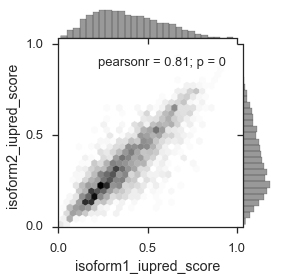

In [17]:
import seaborn as sns
sns.set(style='ticks', context='talk')
%matplotlib inline

color = 'black'

g = sns.jointplot('isoform1_iupred_score', 'isoform2_iupred_score', size=4, xlim=(0, 1), ylim=(0, 1),
                  data=splicing_feature_data, kind='hex', color=color, joint_kws=dict(mincnt=1))
g.ax_joint.locator_params(nbins=2)
g.fig.savefig('/home/obotvinnik/Dropbox/figures2/singlecell_pnm/iupred_scores_jointplot_hex.pdf')

To make a colorbar, get the maximum values in the bins form the plot.

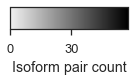

In [19]:
import matplotlib.pyplot as plt
import matplotlib as mpl

hexbins = g.ax_joint.collections[0]
vmax = np.max(hexbins.get_array())

fig, ax = plt.subplots(figsize=(2, 1.25))
# Set the colormap and norm to correspond to the data for which
# the colorbar will be used.
cmap = sns.light_palette(color, as_cmap=True)
norm = mpl.colors.Normalize(vmin=0, vmax=vmax)

# ColorbarBase derives from ScalarMappable and puts a colorbar
# in a specified axes, so it has everything needed for a
# standalone colorbar.  There are many more kwargs, but the
# following gives a basic continuous colorbar with ticks
# and labels.
cb = mpl.colorbar.ColorbarBase(ax, cmap=cmap, ticks=[0, 30, 60],
                                   norm=norm,
                                   orientation='horizontal')
cb.set_label('Isoform pair count')
fig.tight_layout()
fig.savefig('/home/obotvinnik/Dropbox/figures2/singlecell_pnm/iupred_scores_jointplot_hex_colorbar.pdf')